In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from google.colab import files
import pandas as pd
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM
from scipy.stats import gaussian_kde
from tensorflow.keras.layers import SimpleRNN, Dense
from sklearn.model_selection import train_test_split
from tensorflow import keras
from sklearn.preprocessing import StandardScaler


from sklearn import svm
from sklearn.covariance import EllipticEnvelope
from sklearn.ensemble import IsolationForest
from sklearn.neighbors import LocalOutlierFactor

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving Markdata.csv to Markdata.csv


In [ ]:
cdf = pd.read_csv('Markdata.csv')
cdf

,Unnamed: 0,CandidateID,M1,M2,M3,M4,M5,Final
0,0,4041001,71.0,72.0,78.0,75.0,77.0,75.0
1,1,4041002,88.0,84.0,82.0,89.0,82.0,80.0
2,2,4041003,57.0,55.0,57.0,53.0,53.0,65.0
3,3,4041004,63.0,61.0,60.0,66.0,67.0,61.0
4,4,4041005,67.0,60.0,60.0,61.0,63.0,83.0
...,...,...,...,...,...,...,...,...
435,435,4041436,55.0,57.0,54.0,57.0,51.0,86.0
436,436,4041437,71.0,77.0,75.0,74.0,76.0,76.0
437,437,4041438,59.0,58.0,57.0,55.0,58.0,67.4
438,438,4041439,64.0,60.0,60.0,64.0,60.0,87.0


In [ ]:
X = cdf[['M1', 'M2', 'M3', 'M4', 'M5']]
y = cdf['Final']

In [ ]:
# Extract input features (M1, M2, M3, M4, M5) and target variable (Final)
X = cdf[['M1', 'M2', 'M3', 'M4', 'M5']].values
y = cdf['Final'].values

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create an RNN model
model = Sequential()
model.add(SimpleRNN(units=32, activation='relu', input_shape=(X_train.shape[1], 1)))
model.add(Dense(1))  # Output layer with a single neuron

# Compile the model
model.compile(loss='mean_squared_error', optimizer='adam')

# Reshape the input data to match the required format
X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], 1)

# Train the model
model.fit(X_train, y_train, epochs=50, batch_size=32, verbose=2)

# Evaluate the model on the test data
loss = model.evaluate(X_test, y_test, verbose=2)
print(f'Test loss: {loss}')

# Make predictions
predictions = model.predict(X_test)

# You can use these predictions to evaluate the model's performance


Epoch 1/50
11/11 - 1s - loss: 10465.0430 - 1s/epoch - 101ms/step
Epoch 2/50
11/11 - 0s - loss: 8432.9697 - 43ms/epoch - 4ms/step
Epoch 3/50
11/11 - 0s - loss: 6902.5034 - 32ms/epoch - 3ms/step
Epoch 4/50
11/11 - 0s - loss: 5600.9209 - 33ms/epoch - 3ms/step
Epoch 5/50
11/11 - 0s - loss: 4254.7119 - 27ms/epoch - 2ms/step
Epoch 6/50
11/11 - 0s - loss: 2843.0503 - 29ms/epoch - 3ms/step
Epoch 7/50
11/11 - 0s - loss: 1485.5153 - 27ms/epoch - 2ms/step
Epoch 8/50
11/11 - 0s - loss: 476.6712 - 27ms/epoch - 2ms/step
Epoch 9/50
11/11 - 0s - loss: 101.8330 - 36ms/epoch - 3ms/step
Epoch 10/50
11/11 - 0s - loss: 111.4229 - 29ms/epoch - 3ms/step
Epoch 11/50
11/11 - 0s - loss: 88.1726 - 28ms/epoch - 3ms/step
Epoch 12/50
11/11 - 0s - loss: 81.9334 - 32ms/epoch - 3ms/step
Epoch 13/50
11/11 - 0s - loss: 82.5254 - 31ms/epoch - 3ms/step
Epoch 14/50
11/11 - 0s - loss: 81.2855 - 27ms/epoch - 2ms/step
Epoch 15/50
11/11 - 0s - loss: 81.2503 - 29ms/epoch - 3ms/step
Epoch 16/50
11/11 - 0s - loss: 81.2483 - 33ms/

In [ ]:
# Extract the input features (M1, M2, M3, M4, M5) from the concatenated dataframe
X = cdf[['M1', 'M2', 'M3', 'M4', 'M5']].values

# Reshape the input data to match the model's input shape
X = X.reshape(X.shape[0], X.shape[1], 1)

# Make predictions using the trained model
predictions = model.predict(X)

# Round the predicted values to whole numbers
rounded_predictions = np.round(predictions)

# Extract the actual target values (Final) from the concatenated dataframe
actual_values = cdf['Final'].values

# Calculate the differences between actual and rounded predicted values
differences = actual_values - rounded_predictions[:, 0]

# Create a new DataFrame to display the differences along with input data
result_df = cdf.copy()  # Create a copy of the concatenated dataframe
result_df['Predicted'] = rounded_predictions  # Add the predicted values to the new DataFrame
result_df['Difference'] = differences  # Add the differences to the new DataFrame

# Display the new DataFrame
print(result_df)


14/14 [==============================] - 0s 2ms/step
     Unnamed: 0  CandidateID    M1    M2    M3    M4    M5  Final  Predicted  \
0             0      4041001  71.0  72.0  78.0  75.0  77.0   75.0       83.0   
1             1      4041002  88.0  84.0  82.0  89.0  82.0   80.0       92.0   
2             2      4041003  57.0  55.0  57.0  53.0  53.0   65.0       60.0   
3             3      4041004  63.0  61.0  60.0  66.0  67.0   61.0       69.0   
4             4      4041005  67.0  60.0  60.0  61.0  63.0   83.0       67.0   
..          ...          ...   ...   ...   ...   ...   ...    ...        ...   
435         435      4041436  55.0  57.0  54.0  57.0  51.0   86.0       60.0   
436         436      4041437  71.0  77.0  75.0  74.0  76.0   76.0       82.0   
437         437      4041438  59.0  58.0  57.0  55.0  58.0   67.4       63.0   
438         438      4041439  64.0  60.0  60.0  64.0  60.0   87.0       67.0   
439         439      4041440  54.0  50.0  51.0  52.0  55.0   89.0  

In [ ]:
result_df

,Unnamed: 0,CandidateID,M1,M2,M3,M4,M5,Final,Predicted,Difference
0,0,4041001,71.0,72.0,78.0,75.0,77.0,75.0,83.0,-8.0
1,1,4041002,88.0,84.0,82.0,89.0,82.0,80.0,92.0,-12.0
2,2,4041003,57.0,55.0,57.0,53.0,53.0,65.0,60.0,5.0
3,3,4041004,63.0,61.0,60.0,66.0,67.0,61.0,69.0,-8.0
4,4,4041005,67.0,60.0,60.0,61.0,63.0,83.0,67.0,16.0
...,...,...,...,...,...,...,...,...,...,...
435,435,4041436,55.0,57.0,54.0,57.0,51.0,86.0,60.0,26.0
436,436,4041437,71.0,77.0,75.0,74.0,76.0,76.0,82.0,-6.0
437,437,4041438,59.0,58.0,57.0,55.0,58.0,67.4,63.0,4.4
438,438,4041439,64.0,60.0,60.0,64.0,60.0,87.0,67.0,20.0


In [ ]:
#threshold = 10  # You can adjust this threshold as needed
#result_df['mal'] = result_df['Difference'].apply(lambda x: 1 if x > threshold else 0)

In [ ]:
result_df

,Unnamed: 0,CandidateID,M1,M2,M3,M4,M5,Final,Predicted,Difference
0,0,4041001,71.0,72.0,78.0,75.0,77.0,75.0,83.0,-8.0
1,1,4041002,88.0,84.0,82.0,89.0,82.0,80.0,92.0,-12.0
2,2,4041003,57.0,55.0,57.0,53.0,53.0,65.0,60.0,5.0
3,3,4041004,63.0,61.0,60.0,66.0,67.0,61.0,69.0,-8.0
4,4,4041005,67.0,60.0,60.0,61.0,63.0,83.0,67.0,16.0
...,...,...,...,...,...,...,...,...,...,...
435,435,4041436,55.0,57.0,54.0,57.0,51.0,86.0,60.0,26.0
436,436,4041437,71.0,77.0,75.0,74.0,76.0,76.0,82.0,-6.0
437,437,4041438,59.0,58.0,57.0,55.0,58.0,67.4,63.0,4.4
438,438,4041439,64.0,60.0,60.0,64.0,60.0,87.0,67.0,20.0


In [ ]:
from sklearn.metrics import mean_squared_error
actual = result_df['Final']
pred = result_df['Predicted']

mse = mean_squared_error(actual, pred)
print("Mean Squared Error:", mse)

Mean Squared Error: 80.932


<ipython-input-15-81a810c145a1>:6: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=False`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(actual_values, label="Actual", shade=False)
<ipython-input-15-81a810c145a1>:7: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=False`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(predicted_values, label="Predicted", shade=False)


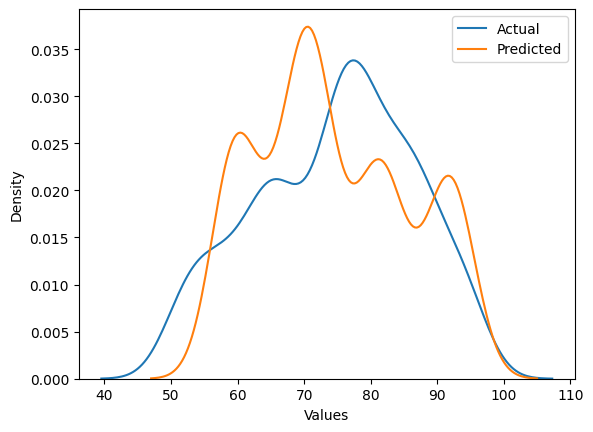

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

actual_values = result_df['Final']
predicted_values = result_df['Predicted']
sns.kdeplot(actual_values, label="Actual", shade=False)
sns.kdeplot(predicted_values, label="Predicted", shade=False)

plt.xlabel("Values")
plt.ylabel("Density")
plt.legend()

# Show the plot
plt.show()

In [ ]:
#count_of_ones = (result_df['mal'] == 1).sum()
#print(count_of_ones)

In [ ]:
import pandas as pd
from sklearn.svm import OneClassSVM
from sklearn.neighbors import LocalOutlierFactor
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.ensemble import IsolationForest

# Your DataFrame (result_df) should be defined here

# List of outlier detection algorithms
outlier_algorithms = [
    ("One-Class SVM", OneClassSVM(nu=0.1)),
    ("Isolation Forest", IsolationForest(n_estimators=150,contamination=0.1, random_state=42))
]
# Create a new column "Outlier" to classify outliers (1) and non-outliers (0)
for name, algorithm in outlier_algorithms:
    if name == "One-Class SVM":
        # The One-Class SVM assigns -1 to outliers and 1 to inliers, so we invert it
        result_df[name] = (algorithm.fit_predict(result_df[['Difference']].values) == -1).astype(int)
    elif name == "Isolation Forest":
        # The Isolation Forest assigns -1 to outliers and 1 to inliers, so we invert it
        result_df[name] = (algorithm.fit_predict(result_df[['Difference']].values) == -1).astype(int)

# Sum the classifications from different algorithms individually
for name, algorithm in outlier_algorithms:
    result_df[name] = result_df[name].astype(int)

# Sum the individual algorithm classifications to get the total outlier count
result_df['Outlier'] = result_df[[name for name, _ in outlier_algorithms]].sum(axis=1)

# If 'Outlier' is greater than zero, mark it as an outlier (1), otherwise, it's not an outlier (0)
result_df['Outlier'] = (result_df['Outlier'] > 0.5).astype(int)

# Print the DataFrame with the 'Outlier' column
print(result_df)


     Unnamed: 0  CandidateID    M1    M2    M3    M4    M5  Final  Predicted  \
0             0      4041001  71.0  72.0  78.0  75.0  77.0   75.0       83.0   
1             1      4041002  88.0  84.0  82.0  89.0  82.0   80.0       92.0   
2             2      4041003  57.0  55.0  57.0  53.0  53.0   65.0       60.0   
3             3      4041004  63.0  61.0  60.0  66.0  67.0   61.0       69.0   
4             4      4041005  67.0  60.0  60.0  61.0  63.0   83.0       67.0   
..          ...          ...   ...   ...   ...   ...   ...    ...        ...   
435         435      4041436  55.0  57.0  54.0  57.0  51.0   86.0       60.0   
436         436      4041437  71.0  77.0  75.0  74.0  76.0   76.0       82.0   
437         437      4041438  59.0  58.0  57.0  55.0  58.0   67.4       63.0   
438         438      4041439  64.0  60.0  60.0  64.0  60.0   87.0       67.0   
439         439      4041440  54.0  50.0  51.0  52.0  55.0   89.0       57.0   

     Difference  One-Class SVM  Isolati

In [ ]:
result_df

,Unnamed: 0,CandidateID,M1,M2,M3,M4,M5,Final,Predicted,Difference,One-Class SVM,Isolation Forest,Outlier
0,0,4041001,71.0,72.0,78.0,75.0,77.0,75.0,83.0,-8.0,0,0,0
1,1,4041002,88.0,84.0,82.0,89.0,82.0,80.0,92.0,-12.0,0,1,1
2,2,4041003,57.0,55.0,57.0,53.0,53.0,65.0,60.0,5.0,0,0,0
3,3,4041004,63.0,61.0,60.0,66.0,67.0,61.0,69.0,-8.0,0,0,0
4,4,4041005,67.0,60.0,60.0,61.0,63.0,83.0,67.0,16.0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
435,435,4041436,55.0,57.0,54.0,57.0,51.0,86.0,60.0,26.0,1,1,1
436,436,4041437,71.0,77.0,75.0,74.0,76.0,76.0,82.0,-6.0,0,0,0
437,437,4041438,59.0,58.0,57.0,55.0,58.0,67.4,63.0,4.4,0,0,0
438,438,4041439,64.0,60.0,60.0,64.0,60.0,87.0,67.0,20.0,0,1,1


In [ ]:
result_df["Outlier"] = result_df["One-Class SVM"] & result_df["Isolation Forest"]

In [ ]:
result_df

,Unnamed: 0,CandidateID,M1,M2,M3,M4,M5,Final,Predicted,Difference,One-Class SVM,Isolation Forest,Outlier
0,0,4041001,71.0,72.0,78.0,75.0,77.0,75.0,83.0,-8.0,0,0,0
1,1,4041002,88.0,84.0,82.0,89.0,82.0,80.0,92.0,-12.0,0,1,0
2,2,4041003,57.0,55.0,57.0,53.0,53.0,65.0,60.0,5.0,0,0,0
3,3,4041004,63.0,61.0,60.0,66.0,67.0,61.0,69.0,-8.0,0,0,0
4,4,4041005,67.0,60.0,60.0,61.0,63.0,83.0,67.0,16.0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
435,435,4041436,55.0,57.0,54.0,57.0,51.0,86.0,60.0,26.0,1,1,1
436,436,4041437,71.0,77.0,75.0,74.0,76.0,76.0,82.0,-6.0,0,0,0
437,437,4041438,59.0,58.0,57.0,55.0,58.0,67.4,63.0,4.4,0,0,0
438,438,4041439,64.0,60.0,60.0,64.0,60.0,87.0,67.0,20.0,0,1,0


In [ ]:
outlier_count = result_df["Outlier"].sum()
oneclass = result_df["One-Class SVM"].sum()
Iso = result_df['Isolation Forest'].sum()
# Display the count
print("Number of outliers:", outlier_count)
print("One-class:", oneclass)
print("iso:", Iso)

Number of outliers: 23
One-class: 39
iso: 42


In [ ]:
outliers = result_df[result_df['Outlier'] == 1]
outlier_candidate_ids = outliers['CandidateID']
print(outlier_candidate_ids)

12     4041013
16     4041017
21     4041022
24     4041025
37     4041038
87     4041088
104    4041105
129    4041130
136    4041137
146    4041147
176    4041177
186    4041187
205    4041206
214    4041215
228    4041229
277    4041278
302    4041303
312    4041313
330    4041331
368    4041369
431    4041432
435    4041436
439    4041440
Name: CandidateID, dtype: int64


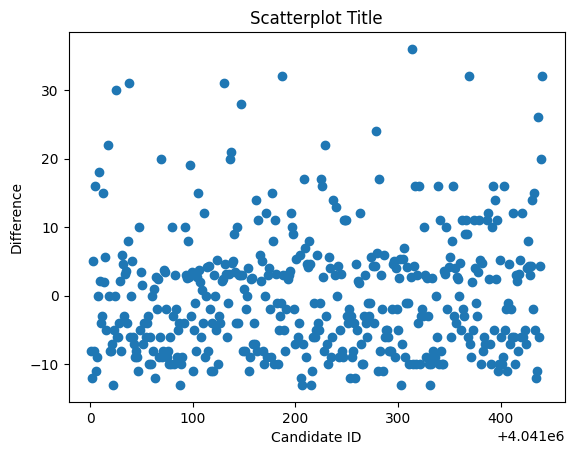

In [ ]:
import matplotlib.pyplot as plt

x = result_df['CandidateID']  # Replace with your x-values
y = result_df['Difference']  # Replace with your y-values

plt.scatter(x, y)
plt.xlabel('Candidate ID')
plt.ylabel('Difference')
plt.title('Scatterplot Title')
plt.show()

In [ ]:
#from google.colab import files
#result_df.to_csv('Mark Anomaly.csv', index=False)
#files.download('Mark Anomaly.csv')